In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.datasets import mnist


(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


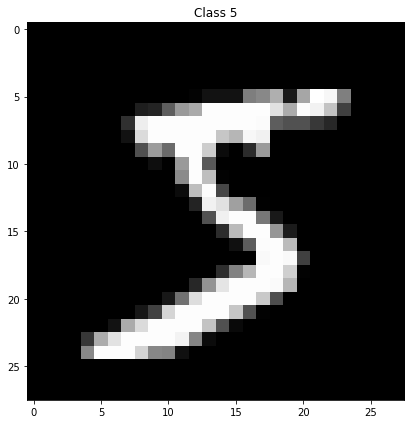

0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    3   18   18   18  126  136  175   26  166  255  247  127  0  0  0  0  
0  0  0  0    0    0    0    0   30   36   94  154  170  253  253  253  253  253  225  172  253  242  195   64  0  0  0  0  
0  0  0  0    0    0    0   49  238  253  253  253  253  253  253  253  253  251   93   82   82   56   39    0  0  0  0  0  


In [11]:
# Let's look at the first sample (image)
plt.rcParams['figure.figsize'] = (6,6)
plt.subplot(1,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Class {}".format(y_train[0]))
plt.tight_layout()
plt.show()
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
        
matprint(X_train[0])

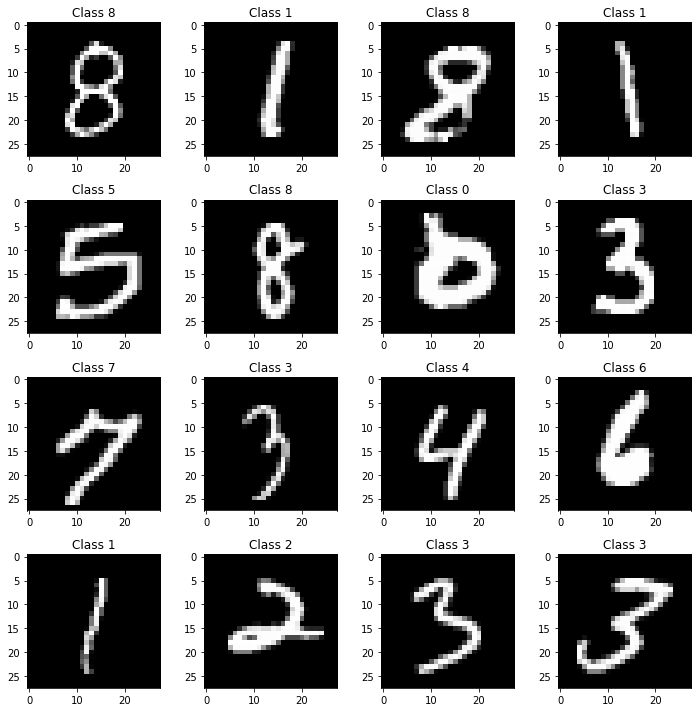

In [3]:
# Let's look at some random samples (images)
plt.rcParams['figure.figsize'] = (10,10)

for i in range(16):
    plt.subplot(4,4,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [4]:
# Prepare data for processing.
# Reshape
# Normalize

X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

X_train_reshaped = X_train_reshaped.astype('float32')  
X_test_reshaped = X_test_reshaped.astype('float32')

X_train_reshaped=X_train_reshaped /255           
X_test_reshaped=X_test_reshaped / 255

print( X_train_reshaped.shape)
print(X_test_reshaped.shape)

(60000, 784)
(10000, 784)


In [5]:
# Convert to one-hot
# Converting to one-hot is not needed in this excersize but in case it is needed
# in future 
#y_train_one_hot=np.zeros((y_train.shape[0],10))
#y_train_one_hot[np.arange(y_train.shape[0]),y_train]=1
#print(y_train[0:10])
#print(y_train_one_hot[0:10,:])

In [6]:
# Create the weight matrix for on layer perceptron with 10 nodes
# Notice the added column for including the biases in the matrix
W = np.random.randn(10, X_train_reshaped.shape[1]+1)


In [8]:
# Train the network
learning_rate=0.001
number_of_epochs=10
number_of_training_samples_to_use=10000
number_of_test_samples_to_use=10000
# Include bias in the input data ( add a column ones in the first column of
# the weight matrix)
z=np.hstack((np.ones((number_of_training_samples_to_use,1)),X_train_reshaped[0:number_of_training_samples_to_use,:]))
z_test=np.hstack((np.ones((number_of_test_samples_to_use,1)),X_test_reshaped[0:number_of_test_samples_to_use,:]))

for epoch in range(number_of_epochs):
  number_of_correct_at_training=0
  for sample_number in range(number_of_training_samples_to_use):
    y_pred= np.argmax(np.dot(W,z[sample_number].T))
    if y_pred != y_train[sample_number]:
      W[y_pred] = W[y_pred]-learning_rate*z[sample_number]
      W[y_train[sample_number]] = W[y_train[sample_number]]+learning_rate*z[sample_number]
    else:
      number_of_correct_at_training +=1
  # Evaluate the accuracy on the test set.
  num__of_correct_testing = 0
  for x, y in zip(z_test, y_test):
    y_pred = np.argmax(np.dot(W, x))
    if y_pred == y:
      num__of_correct_testing += 1
    
    
  print('epoch#: {:d} Accuracy: {:.4f} (training), {:.4f} (testing)'.format(
    epoch,
    float(number_of_correct_at_training) / number_of_training_samples_to_use,
    float(num__of_correct_testing) / number_of_test_samples_to_use
    ))

epoch#: 0 Accuracy: 0.2934 (training), 0.4442 (testing)
epoch#: 1 Accuracy: 0.5302 (training), 0.5900 (testing)
epoch#: 2 Accuracy: 0.6338 (training), 0.6608 (testing)
epoch#: 3 Accuracy: 0.6898 (training), 0.7049 (testing)
epoch#: 4 Accuracy: 0.7241 (training), 0.7314 (testing)
epoch#: 5 Accuracy: 0.7479 (training), 0.7514 (testing)
epoch#: 6 Accuracy: 0.7655 (training), 0.7662 (testing)
epoch#: 7 Accuracy: 0.7774 (training), 0.7769 (testing)
epoch#: 8 Accuracy: 0.7899 (training), 0.7842 (testing)
epoch#: 9 Accuracy: 0.7985 (training), 0.7915 (testing)


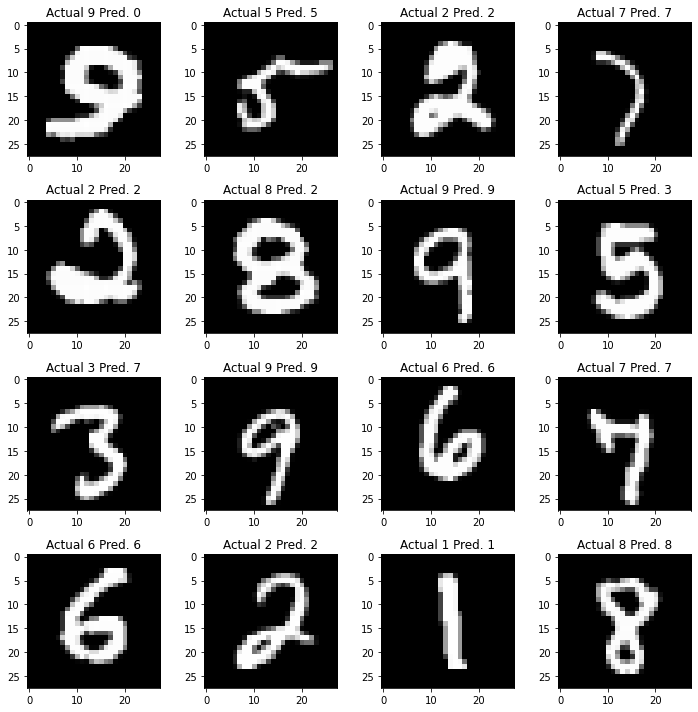

In [9]:
# Let's test the network after it is trained and look at the predictions
plt.rcParams['figure.figsize'] = (10,10)

for i in range(16):
    plt.subplot(4,4,i+1)
    num = random.randint(0, len(X_test))
    # predict
    sample_image=X_test[num]
    sample_image_reshaped= sample_image.reshape(1, X_test.shape[1]*X_test.shape[2])
    z_sample_image=np.hstack(([[1]],sample_image_reshaped))
    y_pred= np.argmax(np.dot(W,z_sample_image.T))
    #print(y_pred)
    plt.imshow(sample_image, cmap='gray', interpolation='none')
    plt.title("Actual {} ; Pred. {}".format(y_test[num],y_pred))
    
plt.tight_layout()